In [1]:
# Kernel regression with Gaussian kernel
import torch
import matplotlib.pyplot as plt

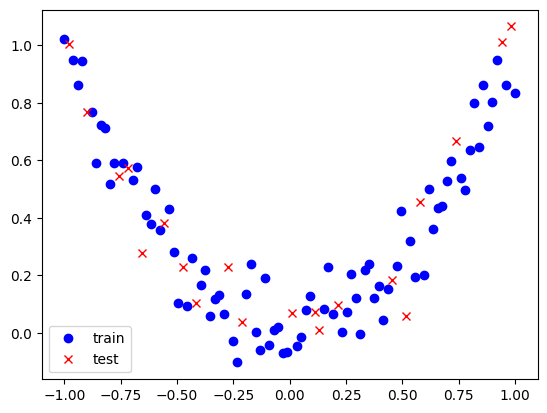

In [17]:
# Create a simple dataset
n_data = 100
n_train = 80
X = torch.linspace(-1,1,n_data).reshape(-1,1)
y = torch.pow(X,2) + 0.1*torch.randn(n_data,1)

# Split data for training and testing
idx = torch.randperm(n_data)
X_train = X[idx[:n_train]]
y_train = y[idx[:n_train]]
X_test = X[idx[n_train:]]
y_test = y[idx[n_train:]]

# plot the data with different marker
plt.plot(X_train, y_train, c='b', marker='o', linestyle='None', label='train')
plt.plot(X_test, y_test, c='r', marker='x', linestyle='None', label='test')
plt.legend()
plt.show()

Test loss:  tensor(0.0107)


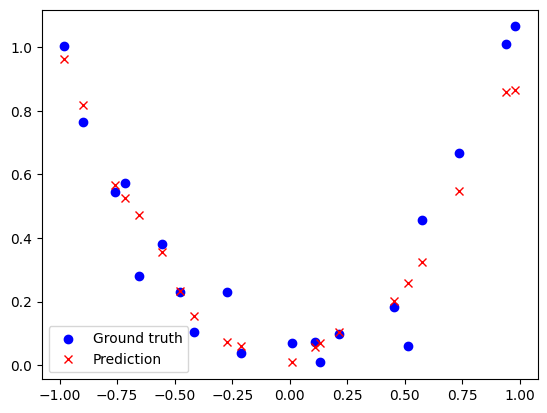

In [28]:
# Phi function
def Phi(x, y, h):
    return torch.exp(-torch.pow(x - y,2)/(2*h**2))

phi_matrix = torch.zeros(n_train, n_train)
h = 0.2
for i in range(n_train):
    for j in range(n_train):
        phi_matrix[i,j] = Phi(X_train[i], X_train[j], h)

# Compute the weight
regularizer = torch.eye(n_train)*0.01
theta = torch.inverse(phi_matrix.t().mm(phi_matrix) + regularizer).mm(phi_matrix.t()).mm(y_train)

# Predict the output
phi_matrix_test = torch.zeros(n_data-n_train, n_train)
for i in range(n_data-n_train):
    for j in range(n_train):
        phi_matrix_test[i,j] = Phi(X_test[i], X_train[j], h)
y_pred = phi_matrix_test.mm(theta)

# Print the test loss and Plot the result
error = torch.mean(torch.pow(y_pred - y_test,2))
print('Test loss: ', error)
plt.scatter(X_test, y_test, c='blue', label='Ground truth')
plt.plot(X_test, y_pred, c='red', label='Prediction', linestyle='None', marker='x')
plt.legend()
plt.show()